___
# BCC Intern 2024
___

Bingung desain

# Climate and Flood Jakarta 2016 -2020

Latar Belakang

Business Questions

## **Workflow Klasifikasi**
- **EDA**
    - Eksplorasi Data Kategorikal
    - Eksplorasi Data Target
    - Eksplorasi Data yang Hilang
    - Outliers
- **Preprocessing Data**
- **Machine Learning**
- **Conclusions**

## Workflow Time Series

In [681]:
#import semua library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [682]:
# import dataset ke dalam notebook
df = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Raw\\climate_vs_flood.csv', header=0)
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


# Klasifikasi
___

## EDA (Klasifikasi)

In [683]:
# mengecek nilai duplikat
df.duplicated().sum()

0

In [684]:
# mengecek nilai pemusatan data dan distribusi data tiap kolom numerik
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,flood
count,5996.000000,6095.000000,6262.000000,6256.000000,3993.000000,5049.000000,6286.000000,6286.000000,6215.000000,6308.000000,6308.000000
mean,25.397598,32.577129,28.338135,76.903932,9.415502,5.008160,4.991887,193.518772,2.338214,96741.052949,0.075460
std,3.226555,5.571823,1.798969,9.719251,18.460319,2.788718,5.856961,109.211671,1.857624,5.239928,0.264153
min,2.400000,21.300000,23.700000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,0.000000
25%,24.400000,31.800000,27.700000,72.000000,0.000000,2.800000,4.000000,80.000000,1.000000,96733.000000,0.000000
50%,25.000000,32.600000,28.400000,77.000000,1.400000,5.400000,4.000000,230.000000,2.000000,96741.000000,0.000000
75%,26.000000,33.400000,29.100000,82.000000,10.500000,7.100000,5.000000,280.000000,3.000000,96745.000000,0.000000
max,246.000000,334.000000,141.600000,488.000000,277.500000,11.600000,185.000000,360.000000,82.000000,96747.000000,1.000000


### Eksplorasi Data Kategorikal

In [685]:
# mengecek nilai unique dari tiap kolom kategorikal
print("Unique Value of region_name : ", df['region_name'].nunique())
print("Unique Value of station_id : ", df['station_id'].nunique())
print("Unique Value of ddd_car : ", df['ddd_car'].nunique())
print("Unique Value of station_name : ", df['station_name'].nunique())

Unique Value of region_name :  4
Unique Value of station_id :  4
Unique Value of ddd_car :  9
Unique Value of station_name :  4


Ada banyak cara untuk melakukan visualisasi terhadap jumlah tiap-tiap nilai unik, untuk kolom kategori pada dataset ini kami menggunakan grouping terlebih dahulu.

In [686]:
df['ddd_car'].unique()

array(['S ', 'W ', 'SW', 'E ', 'SE', 'NE', 'C ', 'N ', 'NW', nan],
      dtype=object)

In [687]:
# grouping untuk visualisasi jumlah masing-masing arah mata angin
df_ddd_car_sum = df.groupby('ddd_car', as_index=0).agg(ddd_cnt=('ddd_car', 'count'))
df_ddd_car_sum

,ddd_car,ddd_cnt
0,C,1239
1,E,626
2,N,1681
3,NE,432
4,NW,158
5,S,258
6,SE,235
7,SW,305
8,W,1273


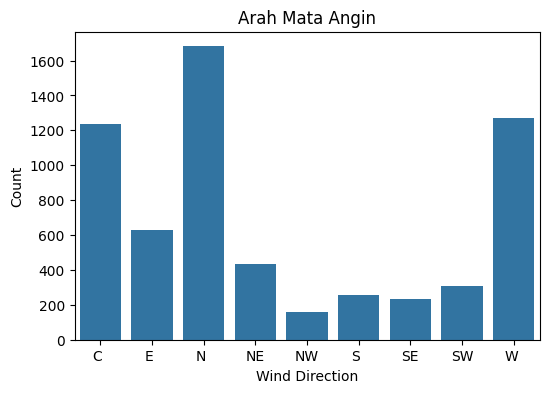

In [688]:
# visualisasi jumlah nilai unik tiap arah mata angin
fig2 = plt.figure(figsize=(6,4))
sns.barplot(data=df_ddd_car_sum, x=df_ddd_car_sum['ddd_car'], y=df_ddd_car_sum['ddd_cnt'])
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.title('Arah Mata Angin')
plt.show()

Pada keempat kolom kategorikal 3 diantaranya memiliki nilai unik yang sama yakni 4. Ketiganya juga merupakan kolom kategori yang menunjukkan tempat atau wilayah pencatatan data. Namun apakah ketiganya itu merujuk pada satu tempat yang sama?


In [689]:
# Apakah stasiun dan region merupakan tempat yang sama?
df_region = df.groupby(['station_id', 'region_name', 'station_name'], as_index=0).agg(station_cnt=('station_id', 'count'))
df_region

,station_id,region_name,station_name,station_cnt
0,96733,Jakarta Selatan,Stasiun Klimatologi Banten,1658
1,96741,Jakarta Utara,Stasiun Meteorologi Maritim Tanjung Priok,1779
2,96745,Jakarta Pusat,Stasiun Meteorologi Kemayoran,1814
3,96747,Jakarta Timur,Halim Perdana Kusuma Jakarta,1057


In [690]:
# mengecek jumlah stasiun pada grouping apakah telah sama dengan dataset
df_region['station_cnt'].sum()

6308

Dari nilai jumlah diatas menunjukkan bahwa di dalam dataset ini hanya terdapat 4 jumlah stasiun saja. Untuk lebih jelasnya lagi bisa dilihat dalam visualisasi data berikut :

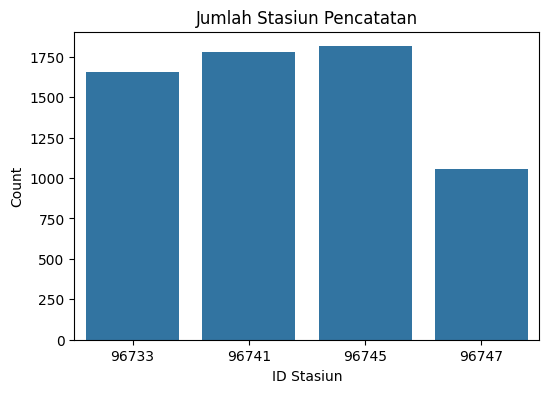

In [691]:
# Jumlah masing-masing stasiun ataupun daerah pencatatan
fig2 = plt.figure(figsize=(6, 4))
sns.barplot(data=df_region, x=df_region['station_id'], y=df_region['station_cnt'])
plt.xlabel('ID Stasiun')
plt.ylabel('Count')
plt.title('Jumlah Stasiun Pencatatan')
plt.show()

Setelah ditelusuri ternyata pada dataset hanya digabung bukan sesuai urutan tahun tetapi urutan stasiun. Sehingga index pertama hingga index ke-1658 adalah stasiun klimatologi banten yang berada di Jakarta Selatan kemudian seterusnya hingga stasiun terakhir. Hal ini bisa dilihat pada rentang pada dataset adalah sama yaitu dari tahun 2016-2020, namun panjang data tiap stasiun tidak sama.

Note edit disini

### Eksplorasi Data Target (Flood)

Eksplorasi ini bertujuan untuk mengetahui apakah terjadi ketidakseimbangan jumlah data target dimana banjir dan tidak

In [692]:
# membuat grouping untuk mengetahui jumlah masing-masing kategori dan untuk bisa divisualisasikan
df_flood_sum = df.groupby('flood').agg(cat_cnt=('flood', 'count'))
df_flood_sum

,cat_cnt
flood,
0,5832
1,476


Berdasarkan data grouping bisa diketahui kasus dimana tidak banjir ada sebanyak 5832 kasus, sedangkan kasus banjir ada sebanyak 476 kasus

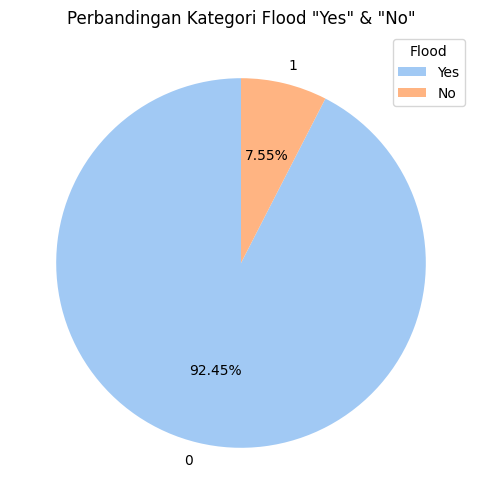

In [693]:
# visualisasi perbandingan kategori banjir dan tidak banjir
colors = sns.color_palette("pastel")

plt.figure(figsize=(6, 6))
plt.pie(df_flood_sum['cat_cnt'], labels=df_flood_sum.index, startangle=90, autopct='%1.2f%%', colors=colors)
plt.title('Perbandingan Kategori Flood "Yes" & "No"')

plt.legend(title='Flood', labels=['Yes', 'No'], loc='upper right')
plt.show()


Dari visualisasi diatas bisa disimpulkan juga terjadi ketimpangan label kategori yang mana kategori 0 atau tidak banjir memiliki jumlah yang lebih banyak

### Data yang hilang

In [694]:
df.isna().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

Kolom curah hujan merupakan kolom dengan missing values terbanyak. Lalu kami berasumsi apakah data yang hilang ini memiliki pola tersendiri. Asumsi awal adalah tidak dilakukan pencatatan saat musim kemarau. Maka dari itu seharusnya data yang hilang paling banyak ada pada sekitar bulan April-September.

In [695]:
df['date'] = pd.to_datetime(df['date'])
df_copy = df.copy()
df_copy['month'] = df['date'].dt.month

In [696]:
null_counts = df_copy[df_copy['RR'].isnull()].groupby('month').size()
null_counts

month
1     123
2      97
3     127
4     170
5     220
6     223
7     274
8     269
9     248
10    205
11    164
12    195
dtype: int64

Text(0.5, 1.0, 'Jumlah NaN Tiap Bulan')

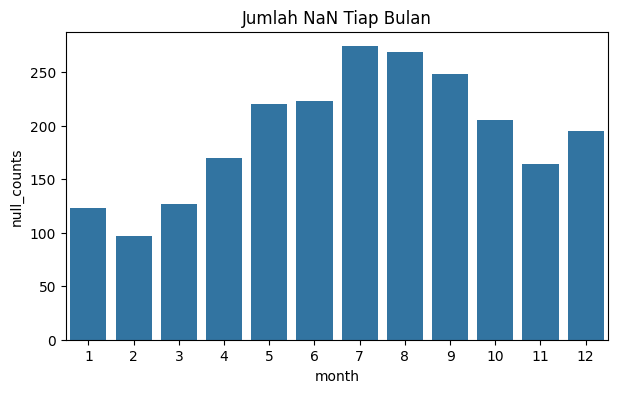

In [697]:
fig = plt.figure(figsize=(7,4))
sns.barplot(x=null_counts.index, y=null_counts)
plt.xlabel('month')
plt.ylabel('null_counts')
plt.title('Jumlah NaN Tiap Bulan')

Dari visualisasi di atas bisa disimpulkan bahwa nilai NaN paling sering ada di bulan-bulan Juni dan Juli yaitu lebih dari 250 nilai.

### Outliers

Memeriksa outliers dari Tx,Tavg,RH_avg,ss,ff_x, ddd_x

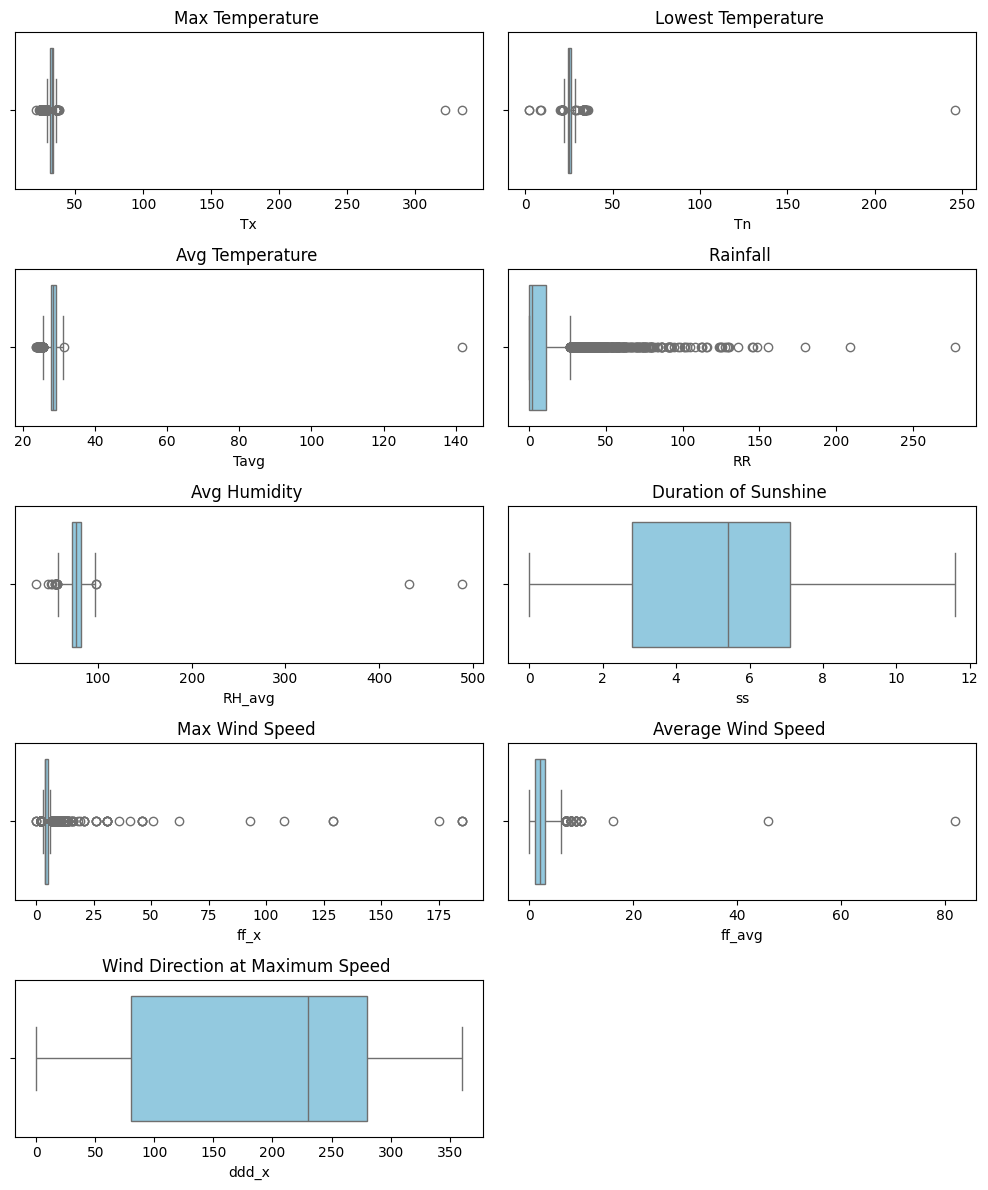

In [698]:
judul = {
    'Tx': 'Max Temperature ',
    'Tn': 'Lowest Temperature ',
    'Tavg': 'Avg Temperature ',
    'RR': 'Rainfall ',
    'RH_avg': 'Avg Humidity ',
    'ss': 'Duration of Sunshine ',
    'ff_x': 'Max Wind Speed ',
    'ff_avg': 'Average Wind Speed ',
    'ddd_x': 'Wind Direction at Maximum Speed '
}

fitur = ['Tx', 'Tn',  'Tavg', 'RR', 'RH_avg', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

plt.figure(figsize=(10, 12))
n_cols = 2
n_rows = 5

# Membuat boxplot untuk setiap fitur menggunakan loop
for i, col in enumerate(fitur, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=col, data=df, color='skyblue')
    plt.title(f'{judul[col]}')  
    plt.ylabel('')

plt.tight_layout()
plt.show()

Untuk lebih jelasnya lagi mengenai distribusi data, kami membuat visualisasi scatter dibawah ini

In [699]:
def plot_weather_data(df, x_column, y_column, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_column], df[y_column]) 
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45) 
    plt.grid(True)
    plt.tight_layout()
    plt.show()


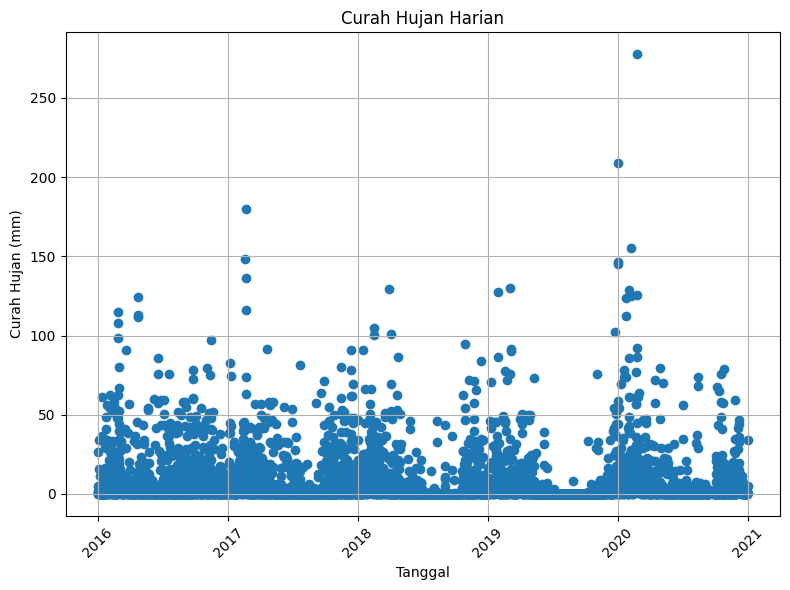

In [700]:
plot_weather_data(df, 'date', 'RR', 'Curah Hujan Harian', 'Tanggal', 'Curah Hujan (mm)')

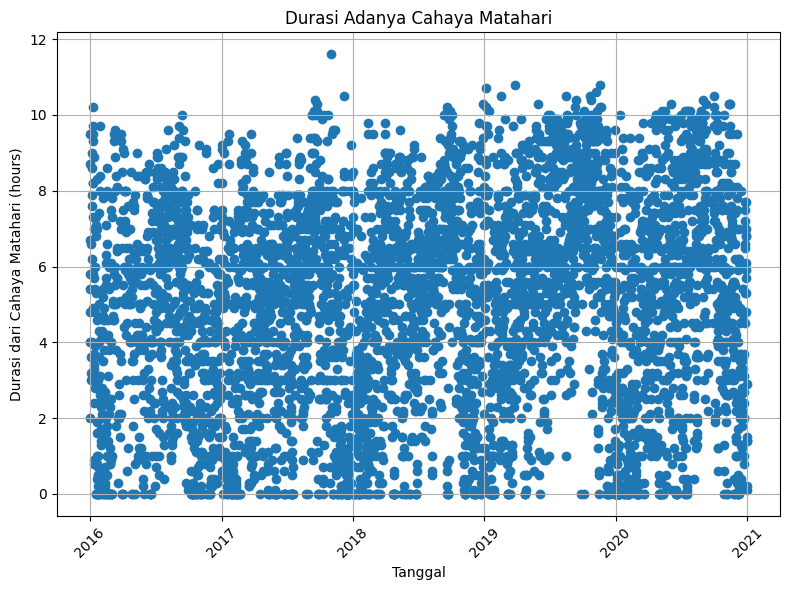

In [701]:
plot_weather_data(df, 'date', 'ss', 'Durasi Adanya Cahaya Matahari', 'Tanggal', 'Durasi dari Cahaya Matahari (hours)')

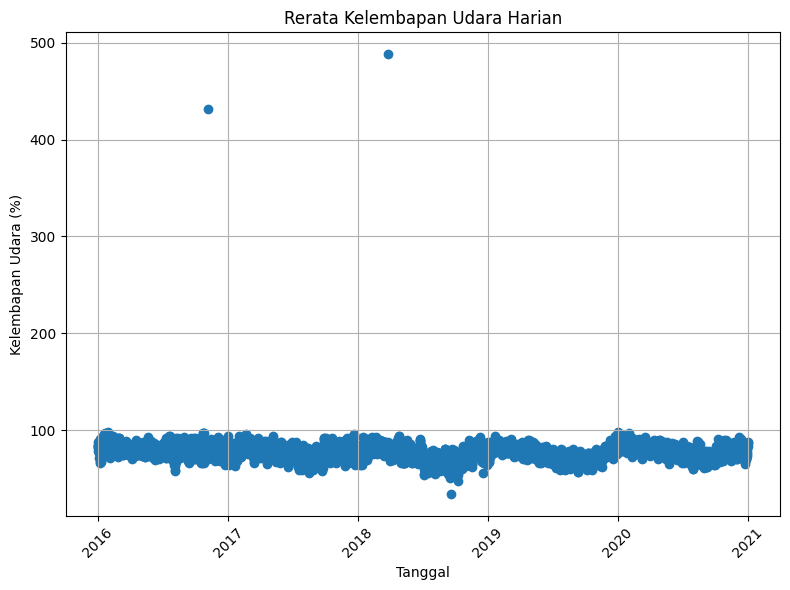

In [702]:
plot_weather_data(df, 'date', 'RH_avg', 'Rerata Kelembapan Udara Harian', 'Tanggal', 'Kelembapan Udara (%)')

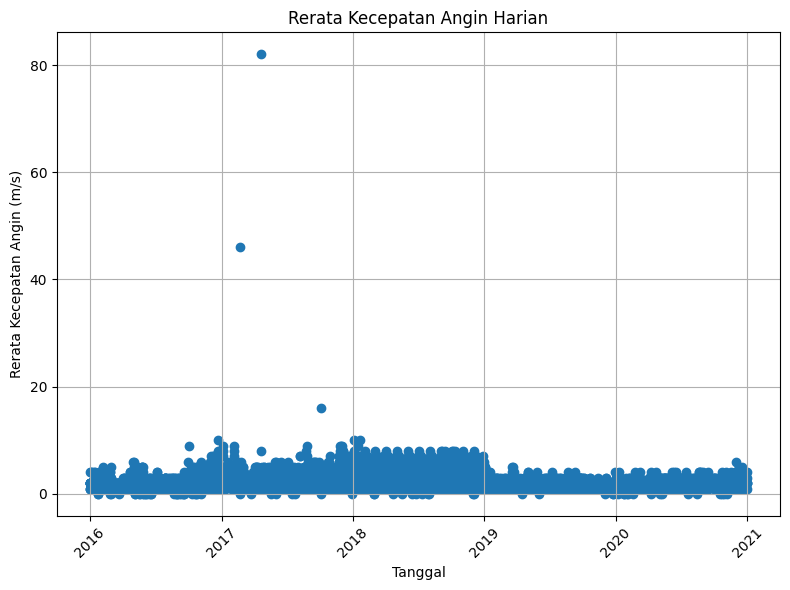

In [703]:
plot_weather_data(df, 'date', 'ff_avg', 'Rerata Kecepatan Angin Harian', 'Tanggal', 'Rerata Kecepatan Angin (m/s)')

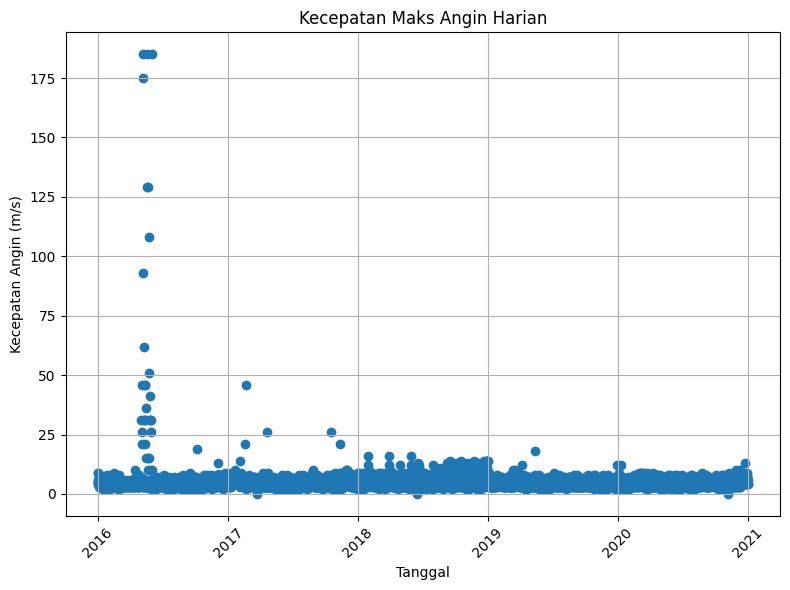

In [704]:
plot_weather_data(df, 'date', 'ff_x', 'Kecepatan Maks Angin Harian', 'Tanggal', 'Kecepatan Angin (m/s)')

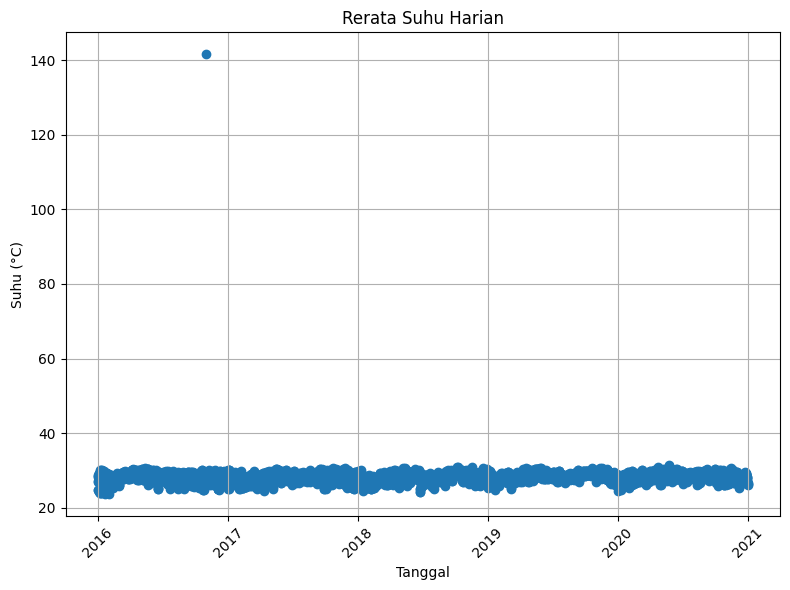

In [705]:
plot_weather_data(df, 'date', 'Tavg', 'Rerata Suhu Harian', 'Tanggal', 'Suhu (°C)')

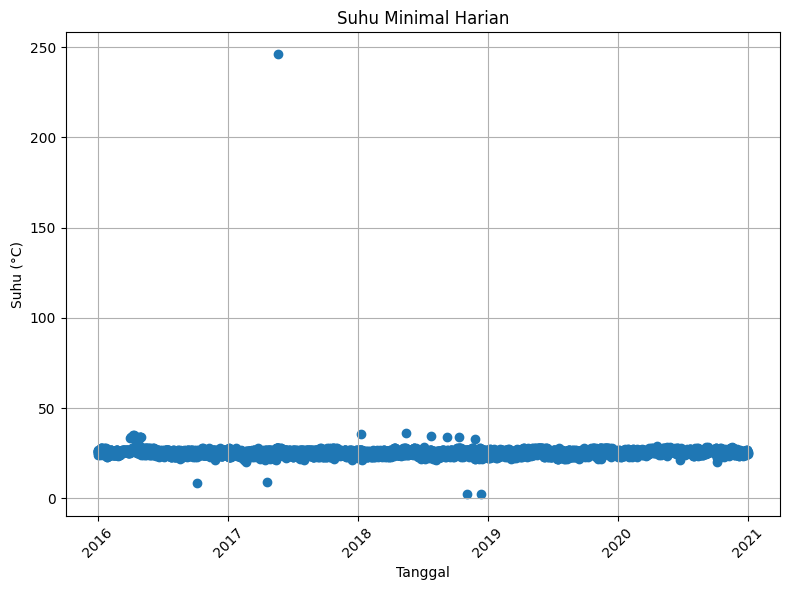

In [706]:
plot_weather_data(df, 'date', 'Tn', 'Suhu Minimal Harian', 'Tanggal', 'Suhu (°C)')

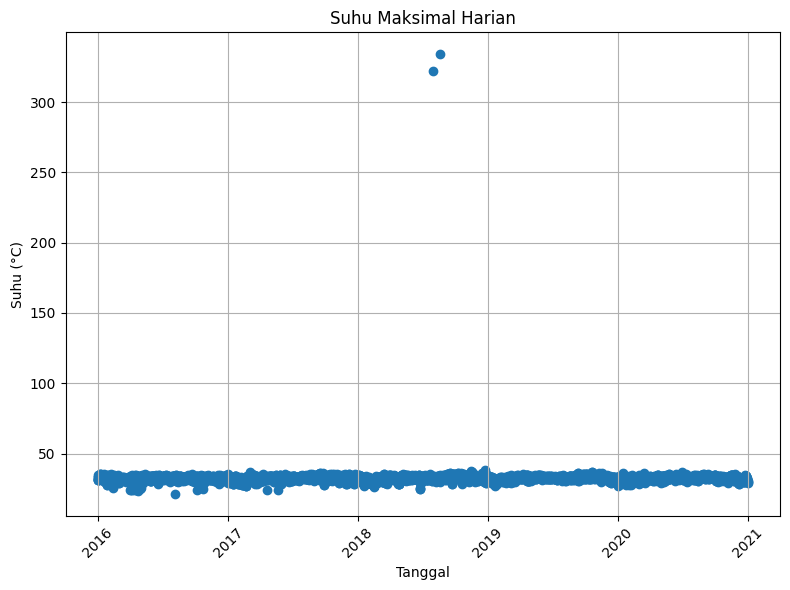

In [707]:
plot_weather_data(df, 'date', 'Tx', 'Suhu Maksimal Harian', 'Tanggal', 'Suhu (°C)')

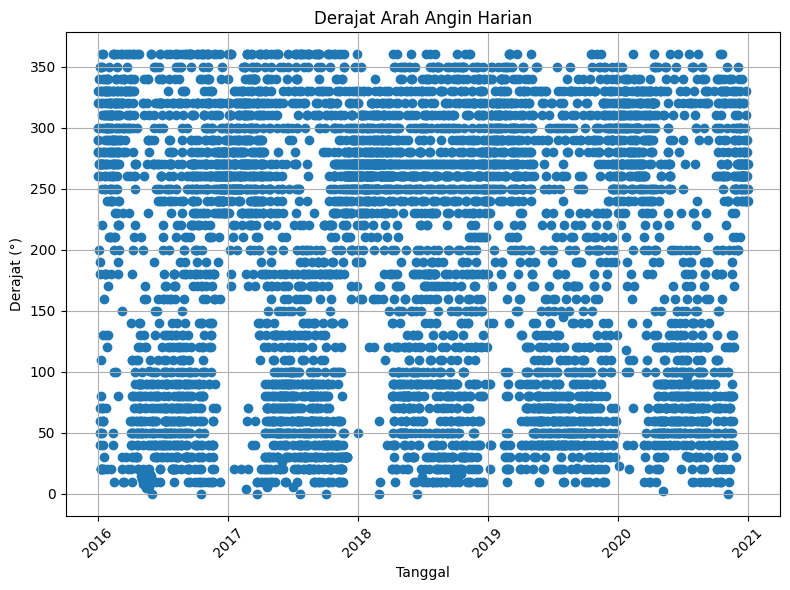

In [708]:
plot_weather_data(df, 'date', 'ddd_x', 'Derajat Arah Angin Harian', 'Tanggal', 'Derajat (°)')

Korelasi antar kolom numerik

In [709]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg', 'ddd_x']

<Axes: >

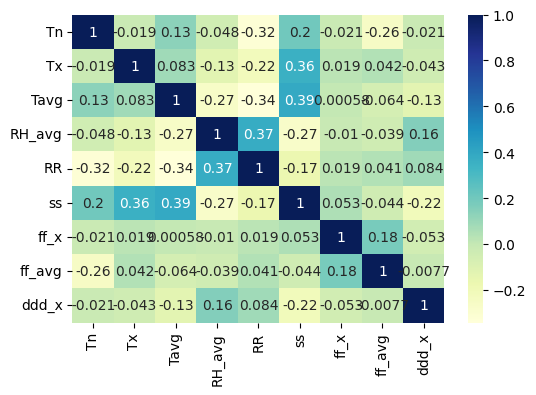

In [710]:
fig = plt.figure(figsize=(6, 4))
sns.heatmap(df[num_cols].corr(), cmap='YlGnBu', annot=True)

## Data Preprocessing (Klasifikasi)

- outliers = z-score (semua kolom numerik selain Curah Hujan)
- NaN Numerik = Interpolasi
- NaN Kategori = Modus

In [711]:
df_interpolate = df.copy()

In [712]:
num_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
cat_cols = ['ddd_car', 'region_name']
target = ['flood']

In [713]:
df_interpolate.isnull().sum()

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64

kita menggunakan teknik interpolasi untuk mengatasi nilai Nan

In [714]:
df_interpolated = df_interpolate.interpolate(method='linear', axis=0)

C:\Users\thebl\AppData\Local\Temp\ipykernel_28348\3533020075.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_interpolate.interpolate(method='linear', axis=0)


In [715]:
df_interpolated['RR'].fillna(df_interpolated['RR'].mean(), inplace=True)

C:\Users\thebl\AppData\Local\Temp\ipykernel_28348\2845706169.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_interpolated['RR'].fillna(df_interpolated['RR'].mean(), inplace=True)


In [716]:
df_interpolated['ddd_car'].fillna(df_interpolated['ddd_car'].mode()[0], inplace=True)

C:\Users\thebl\AppData\Local\Temp\ipykernel_28348\2740728555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_interpolated['ddd_car'].fillna(df_interpolated['ddd_car'].mode()[0], inplace=True)


In [717]:
df_interpolated.isna().sum()

date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
station_id      0
station_name    0
region_name     0
flood           0
dtype: int64

Setelah kita cek kembali sudah tidak ada nilai Nan

In [718]:
def handle_outliers_zscore(df_input, threshold=3):
    
    feature_list = df_input.columns
    for feature in feature_list:
        z_scores = np.abs((df_input - df_input.mean()) / df_input.std())
        df_outliers = df.mask(z_scores > threshold)
    return df_outliers

kita menggunakan filter zscore untuk mengatasi outliers yang ada. Tapi kita tidak memfilter fitur RR karena RR merupakan natural outliers


In [719]:
num_outliers = df_interpolated[['Tn', 'Tx', 'Tavg', 'RH_avg','ss', 'ff_x', 'ddd_x', 'ff_avg']]

In [720]:
def remove_outliers_and_visualize(df, df_copy, features, threshold=3):
    for feature in features:
        # Menghitung Z-score untuk fitur
        z_scores = (df_copy[feature] - df_copy[feature].mean()) / df_copy[feature].std()
        
        outliers = df_copy[(abs(z_scores) > threshold)]
        
        # Hapus outlier dari DataFrame salinan
        df_copy = df_copy.drop(outliers.index)
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        
        # Boxplot sebelum penghapusan outlier
        sns.boxplot(x=feature, data=df, ax=axs[0], color='skyblue')
        axs[0].set_title(f'Boxplot of {feature} (Before Outlier Removal)')
        
        # Boxplot setelah penghapusan outlier
        sns.boxplot(x=feature, data=df_copy, ax=axs[1], color='skyblue')
        axs[1].set_title(f'Boxplot of {feature} (After Outlier Removal)')
        
        plt.tight_layout()
        plt.show()

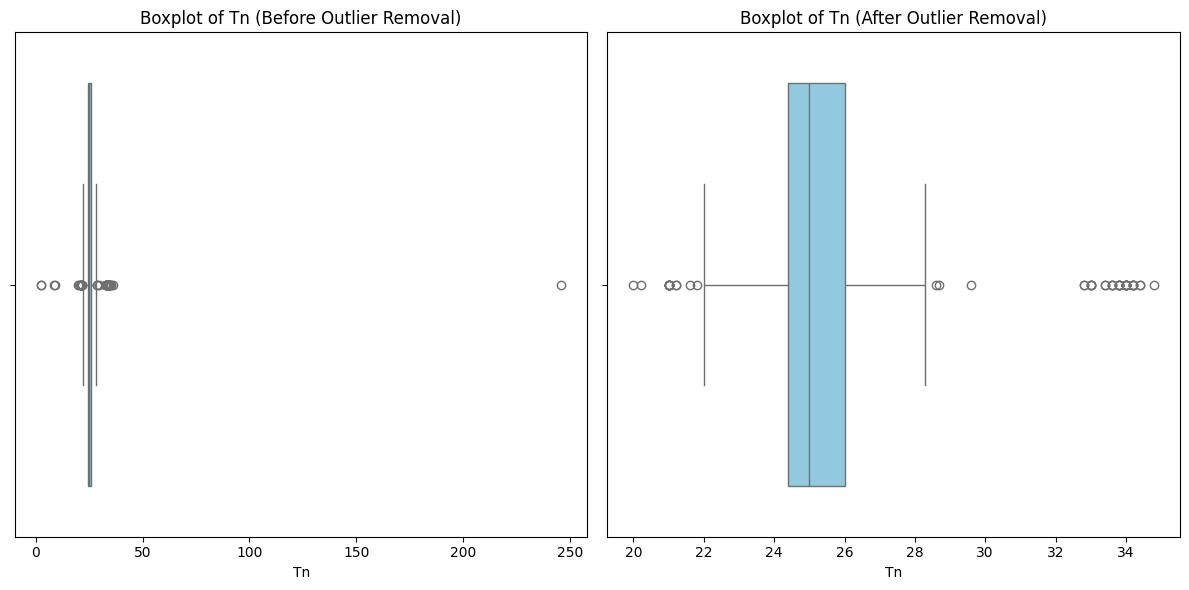

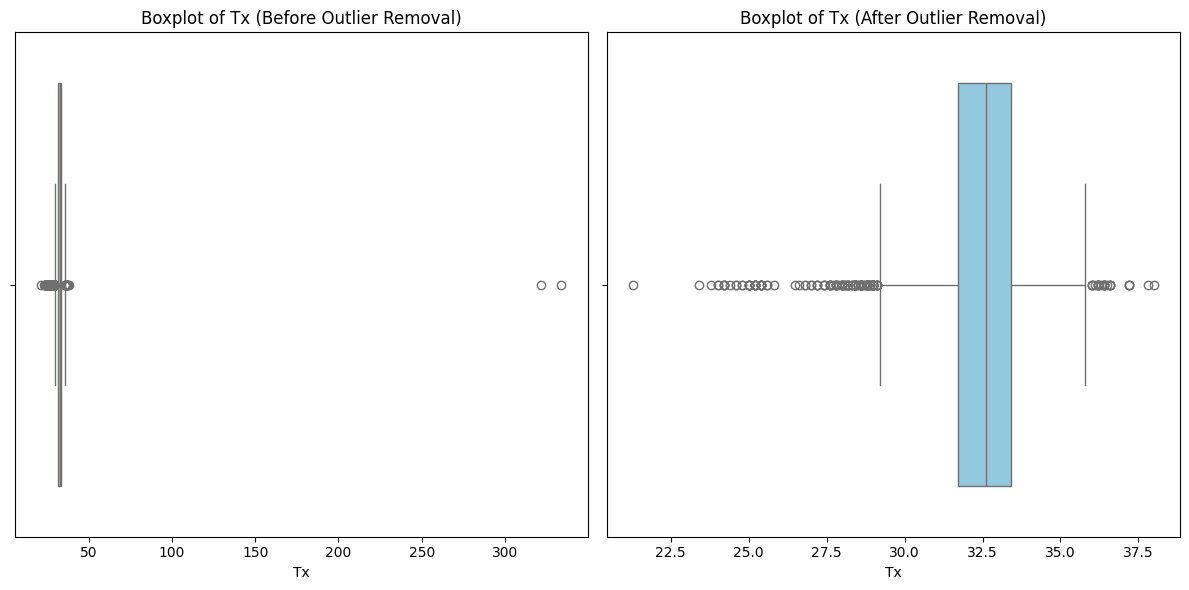

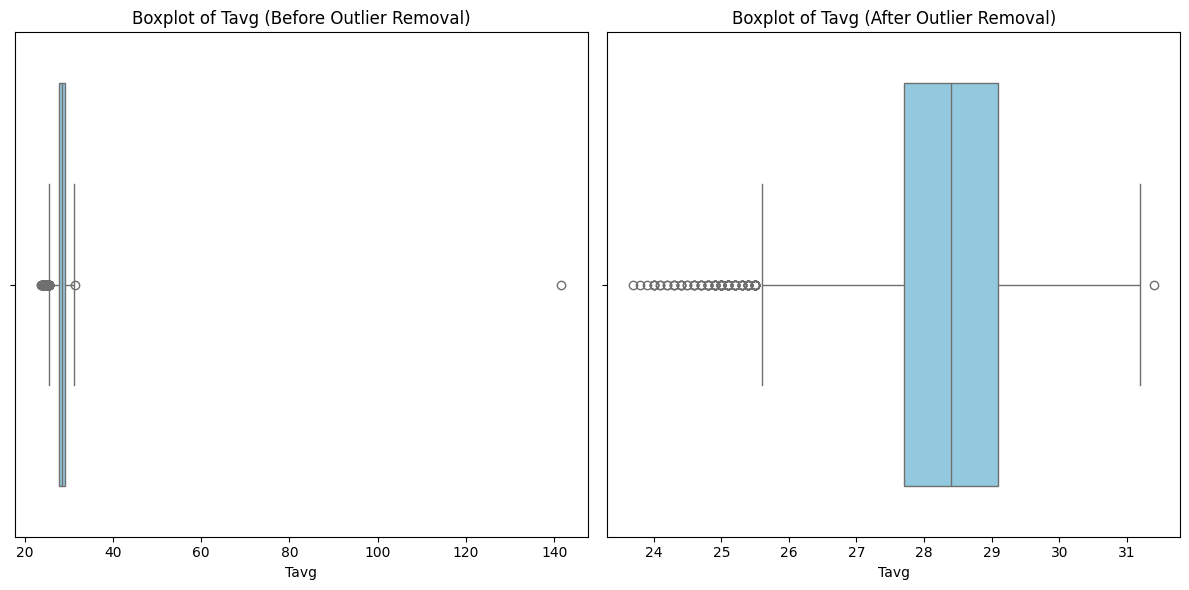

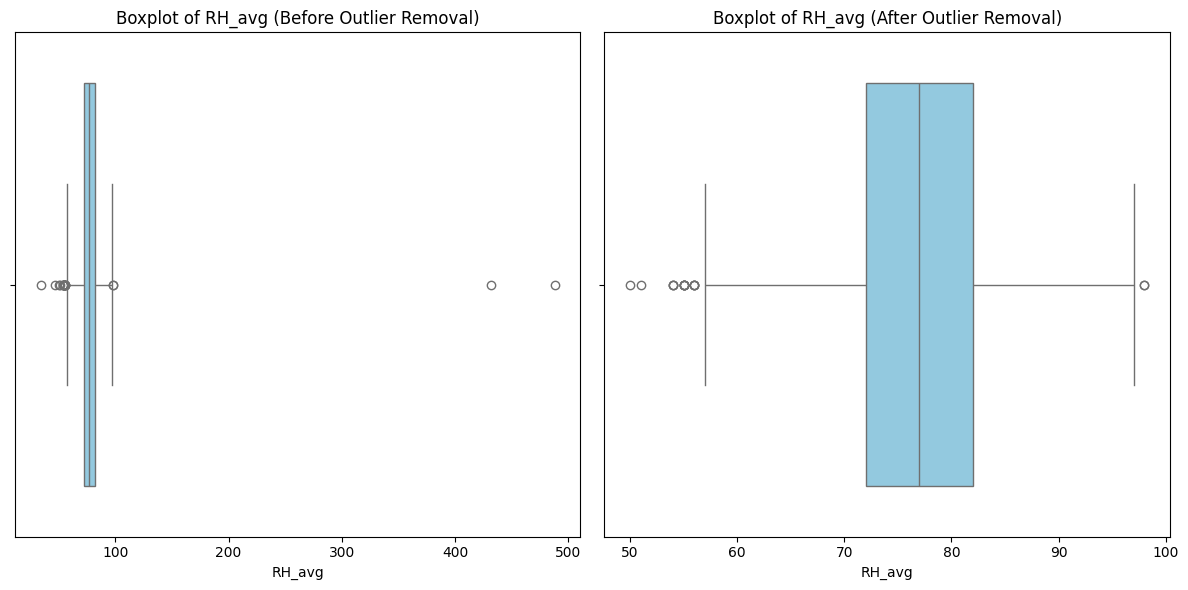

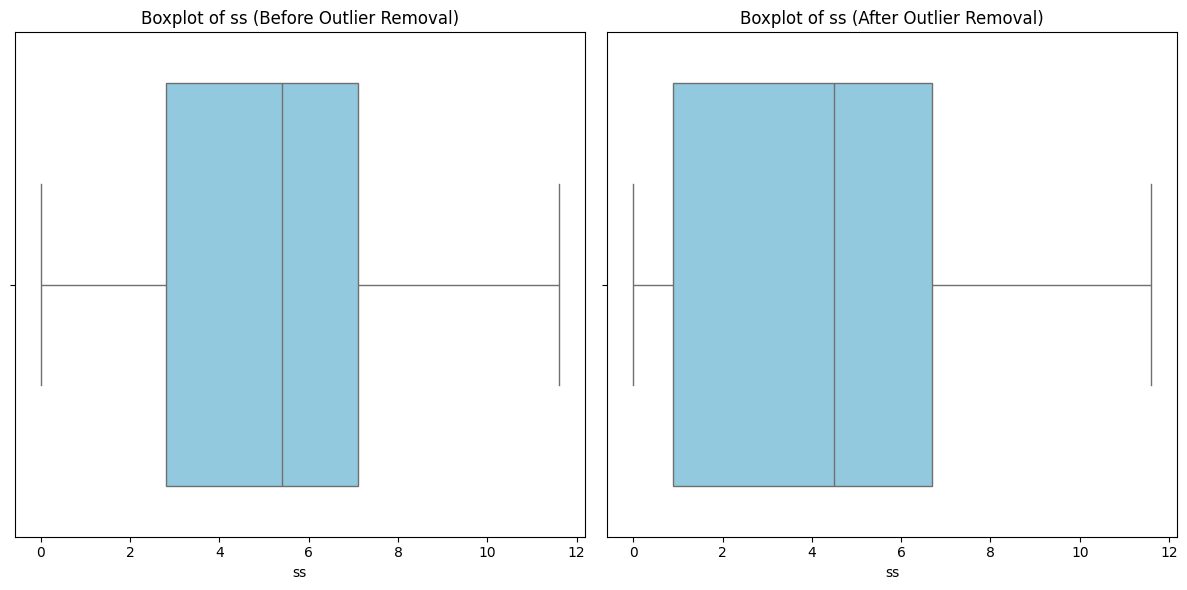

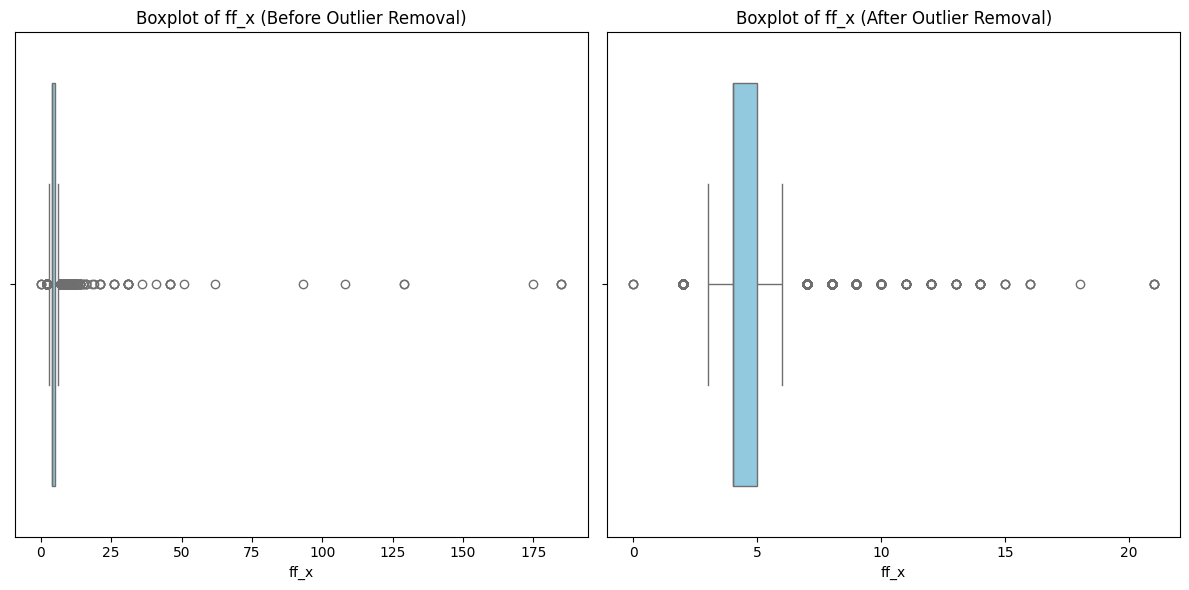

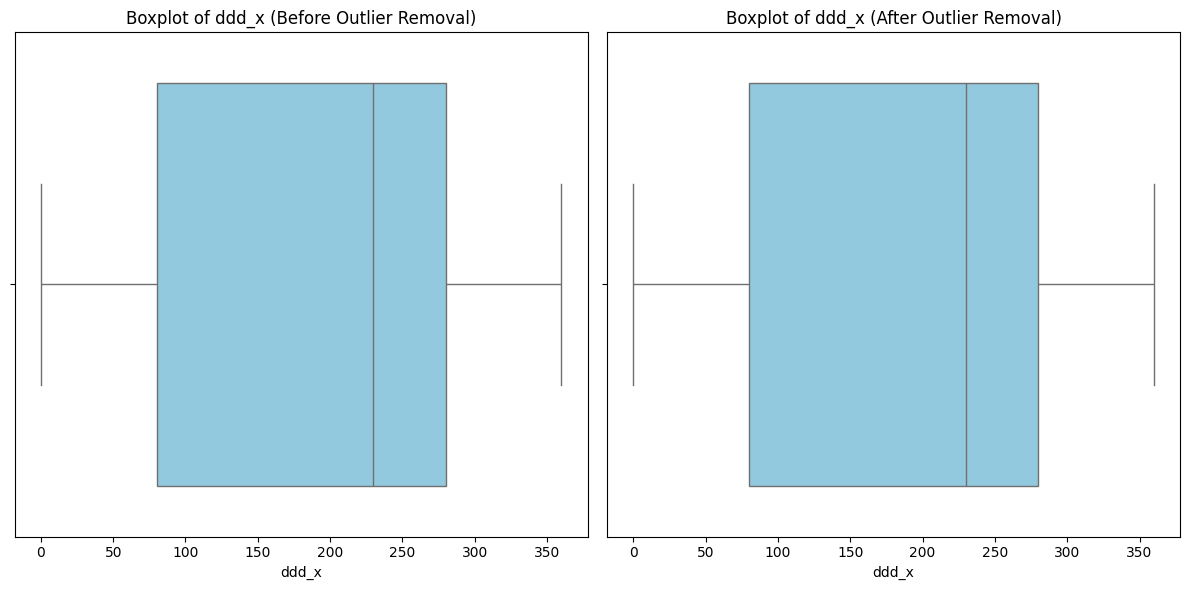

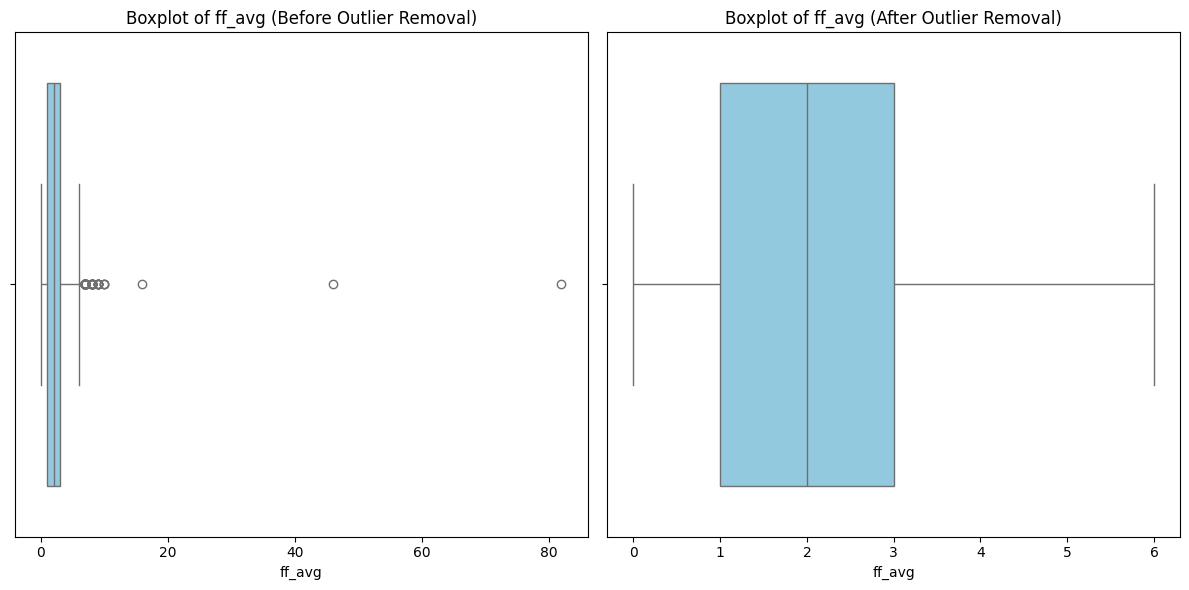

In [721]:
df_dropped = df_interpolate.copy()
df_dropped.drop(columns=['RR'], inplace=True)
num_cols_withourRR = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

remove_outliers_and_visualize(df_dropped,num_outliers,num_cols_withourRR)

In [722]:
df_interpolated_2 = num_outliers.interpolate(method='linear', axis=0)

Disini kita dapat lihat bahwa outliers dari setiap fitur sudah kita atasi

In [723]:
#Cek kembali data setelah di handling
num_outliers.isnull().sum()

Tn        0
Tx        0
Tavg      0
RH_avg    0
ss        0
ff_x      0
ddd_x     0
ff_avg    0
dtype: int64

### Menyiapkan Data untuk Model

Gabungkan semua fitur-fitur yang sudah di handling menjadi satu

In [724]:
df_cleaned = pd.concat([df['date'], df_interpolated_2, df_interpolated['RR'], df_interpolated[cat_cols], df_interpolated['flood']], axis=1)

In [725]:
df_cleaned['RR'].fillna(df_cleaned['RR'].median(), inplace=True)

C:\Users\thebl\AppData\Local\Temp\ipykernel_28348\3251514911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['RR'].fillna(df_cleaned['RR'].median(), inplace=True)


In [726]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6308 non-null   datetime64[ns]
 1   Tn           6308 non-null   float64       
 2   Tx           6308 non-null   float64       
 3   Tavg         6308 non-null   float64       
 4   RH_avg       6308 non-null   float64       
 5   ss           6308 non-null   float64       
 6   ff_x         6308 non-null   float64       
 7   ddd_x        6308 non-null   float64       
 8   ff_avg       6308 non-null   float64       
 9   RR           6308 non-null   float64       
 10  ddd_car      6308 non-null   object        
 11  region_name  6308 non-null   object        
 12  flood        6308 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 640.8+ KB


In [727]:
df_klasifikasi = df_cleaned.copy()

In [728]:
df_target = df_klasifikasi['flood']

In [729]:
df_klasifikasi = df_klasifikasi.drop(['date', 'flood'], axis=1)

Menggunakan one-hot encoding untuk mengubah variabel kategorikal diubah menjadi biner

In [730]:
df_train_dumied = pd.get_dummies(df_klasifikasi, columns=['ddd_car', 'region_name'])

In [731]:
df_train_dumied.dtypes

Tn                             float64
Tx                             float64
Tavg                           float64
RH_avg                         float64
ss                             float64
ff_x                           float64
ddd_x                          float64
ff_avg                         float64
RR                             float64
ddd_car_C                         bool
ddd_car_E                         bool
ddd_car_N                         bool
ddd_car_NE                        bool
ddd_car_NW                        bool
ddd_car_S                         bool
ddd_car_SE                        bool
ddd_car_SW                        bool
ddd_car_W                         bool
region_name_Jakarta Pusat         bool
region_name_Jakarta Selatan       bool
region_name_Jakarta Timur         bool
region_name_Jakarta Utara         bool
dtype: object

Handling Imbalance Data

In [732]:
from imblearn.over_sampling import RandomOverSampler    
X = df_train_dumied
y = df_target

# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah oversampling:
flood
0    5832
1    5832
Name: count, dtype: int64


Kita menggunakan teknik oversampling karena kita ingin menaikan sample kejadian banjir, sedangkan kalau kita menggunakan undersampling malah membuat data kita semakin sedikit dan khawatirnya akan menurunkan peforma dari model

Pembagian dataset menjadi data latih dan data uji

In [733]:
from sklearn.model_selection import train_test_split

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 9331
Jumlah data uji: 2333


## Feature Selection

Fitur seleksi dengan metode RFECV

In [736]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV


# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 20
Best features : Index(['Tn', 'Tx', 'Tavg', 'RH_avg', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'RR',
       'ddd_car_C ', 'ddd_car_E ', 'ddd_car_N ', 'ddd_car_NE', 'ddd_car_S ',
       'ddd_car_SW', 'ddd_car_W ', 'region_name_Jakarta Pusat',
       'region_name_Jakarta Selatan', 'region_name_Jakarta Timur',
       'region_name_Jakarta Utara'],
      dtype='object')


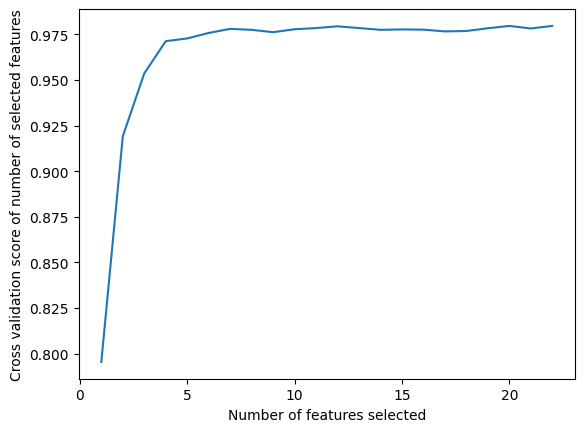

In [737]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

Pada 

## Machine Learning (Klasifikasi)

# Time Series
___

## EDA (Time Series)